In [1]:
#Lending Club Case Study

**Problem Statement**

   In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
   We can ask questions like:
- Does a higher interest rate or loan amount influence the defaulters? 
- What factors affect the defaulters?
- Which customers become defaulters?

 Three factors that decides the defaulters are
- Customer Demographics
- Applied Amount details
- Customer Behavioral attributes  
 We need to consider the attributes which drives for defaulters and find out the drivers using this data set.

## Data Initialization

In [2]:
#Import all the libraries need for the case study
import pandas as pd #to read the data in dataframes
import numpy as np #Library needed for mathematics computation
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # Useful for data visualisation
%matplotlib inline

In [3]:
#Reading csv file and display few rows to see the data set
#low_memory is set False to overcome a warning message
df = pd.read_csv('loan.csv',header=0,low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#check the shape of the data set
df.shape

(39717, 111)

**We have 39717 rows and 111 columns**

In [5]:
#Check the datatypes, Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning
  Under Data cleaning, we have certain ways to follow:
- Fixing Rows and Columns
- Fixing missing values
- Standardising Values
- Fix Invalid Values
- Filtering data

### Filtering Data
Let us check the duplicates of the data

#### Checking for duplicates in the rows
Here attributes **"id"** and **"member_id"** looks like a key values. So verify whether we have duplicates in these two columns.

In [6]:
#Check whether we have any duplicates for the columns id and member_id
duplicate_df = df[df.duplicated(['id','member_id'])]
duplicate_df.shape

(0, 111)

We dont have duplicate rows in this data set. And we have proper rows and columns headings.

### Fixing Missing Values
Drop the columns which have Null values in the entire row.

In [7]:
#Drop the columns which have Null values in all the rows of the column
df = df.dropna(axis=1,how='all')

In [8]:
df.shape

(39717, 57)

Earlier we had 111 columns and after dropping the columns with Null values in all the rows we have total of 57 rows.

In [9]:
#Check the information of the data set like column names, data types, Non-null count etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
#Check values in the dataset for the first 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
#Check the column names in the data set
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [12]:
#Check the number of Null values in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In the above results, we see that columns **mths_since_last_delinq**, **mths_since_last_record**, **next_pymnt_d**, **emp_title**, **emp_length**, **desc** and **pub_rec_bankruptcies** have more null values rows. Let us remove the necessary columns.

In [13]:
#REmove the columns whose value is more than half of the size of the total rows.
rem_columns = df.columns[df.isnull().sum()>(df.shape[0]/2)]
rem_columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

Above columns have more null values more than half of the total rows.

In [14]:
#Remove the columns from the dataset
df = df.drop(rem_columns,axis=1)

In [15]:
df.shape

(39717, 54)

We have removed 3 columns from the data set.

In [16]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


We can note that some columns have zero values in the many rows. So let us calculate percentage of number of zeroes in the rows and remove the column accordingly.

In [17]:
#Percentage calculation for number of zeroes in each column
100*((df==0).sum()/df.shape[0])

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.324798
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       0.000000
emp_length                      0.000000
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                            0.000000
purpose                         0.000000
title                           0.000000
zip_code                        0.000000
addr_state                      0.000000
dti             

**Remove the columns which has percentage of above 95 of zeroes in the rows**

In [18]:
#Extract the columns name which have more percetange of zeroes in the rows.
zero_columns = df.columns[(100*((df==0).sum()/df.shape[0]))>95]
zero_columns

Index(['out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

**zero_columns** contains the name of the columns to be removed.

In [19]:
#Drop the columns by passing "zero_columns" list.
df = df.drop(zero_columns,axis=1)

In [20]:
#Check the shape of the dataset
df.shape

(39717, 47)

Now we can see 47 columns in the dataset from 54 columns.

In [21]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal 

In [22]:
#We see the emp_title has many Null Values. Let us fill it with some value to give better meaning. So we dont miss the
#value while calculating the defaulters detail.
df['emp_title'] = df['emp_title'].fillna("Others")

In **emp_title** column, we see more null values. So let us have some meaningful value instead of removing the null values.

In [23]:
#Check whether Null values are placed with "Others"
df.emp_title.head()

0                      Others
1                       Ryder
2                      Others
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [24]:
#Check for null values
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal 

**emp_length** has many null values. We need to fix it up. Since it is categorical data, we can use mode to fill up the values. But check whether it will alter our analysis.

In [25]:
#Get the value_counts
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [26]:
#Find the mode for the column emp_length
df['emp_length'].mode()[0]

'10+ years'

Here we have '10+ years' as mode for column **emp_length**. But it will deviate the data set. Hence instead we will remove the null values in emp_length column.

In [27]:
#Remove the null values in column emp_length
df = df[~df['emp_length'].isnull()]

Let us convert the string datatype to numeric type by extracting the numbers from the string. Before we need to change to **"< 1 year"** as **"0 year"**. Else when we extract the numeric these two values will join together as 1 years.

In [28]:
df.emp_length = df.emp_length.str.replace('< 1 year','0 year')
df.emp_length.value_counts()

10+ years    8879
0 year       4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [29]:
#Extract the numeric value from the string using regular expression
import re
df.emp_length = df.emp_length.apply(lambda x: re.findall('\d+', str(x))[0])

In [30]:
#Now verify whether the numeric value is extracted
df.emp_length.value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

Convert the data type of object to int64

In [31]:
#Check the data type
df.emp_length.dtype

dtype('O')

In [32]:
#Convert the type as integer
df.emp_length = df.emp_length.astype('int64')

In [33]:
#Check the data type
df.emp_length.dtype

dtype('int64')

In [34]:
#Check the null values in the column
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12495
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal 

Two columns have minimal null values. Let us skip it for now.

In [35]:
#Check again from the number of zeroes in the dataset in each column
(df==0).sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv              129
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  4583
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                          173
delinq_2yrs                34434
earliest_cr_line               0
inq_last_6mths             18753
open_acc                       0
pub_rec                    36649
revol_bal 

Still we can see more number of zero values in the columns. So let us remove the columns which have more zero values and columns which are not necessary for this analysis. Some columns like **total_pymnt**, **total_rec_prncp**, **total_rec_late_fee** etc. are related to the current loan attributes which doesn't affect the defaulter tendency. So we can remove these columns safely.

In [36]:
#Certain loan attributes are not necessary for our analysis. So drop them.
unnecessary_col =["application_type","collection_recovery_fee","initial_list_status","last_pymnt_amnt","last_pymnt_d",
                  "last_credit_pull_d","policy_code","recoveries","total_pymnt","total_pymnt_inv","total_rec_int",
                  "total_rec_late_fee","total_rec_prncp","initial_list_status","earliest_cr_line"]
df =df.drop(unnecessary_col,axis=1)

In [37]:
#Check the shape
df.shape

(38642, 33)

Now we have 33 columns for our analysis after removing unnecessary columns.

In [38]:
#Check the data set info once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  object 
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             38642 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d            

### Filtering Column
Let us filter the  columns not necessary for our analysis

Certain employee attributes are not necessary for our analysis. For example, **url** contains the url of the customer lending loan case detail. Same way **title, desc, zip_code, pymnt_plan, id** and **member_id** is not necessary for us.

In [39]:
#Drop customer attributes not needed for our analysis
cust_unnecessary_col =["url","title","desc","zip_code","pymnt_plan","id","member_id"]
df =df.drop(cust_unnecessary_col,axis=1)

In [40]:
df.shape

(38642, 26)

Now we have 26 columns which is necessary for our analysis.

### Handling incorrect Data types
Next step of Data Cleaning is handling incorrect data types in the columns. So check for each column data type and validate.

In [41]:
#Check the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   funded_amnt           38642 non-null  int64  
 2   funded_amnt_inv       38642 non-null  float64
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_title             38642 non-null  object 
 9   emp_length            38642 non-null  int64  
 10  home_ownership        38642 non-null  object 
 11  annual_inc            38642 non-null  float64
 12  verification_status   38642 non-null  object 
 13  issue_d               38642 non-null  object 
 14  loan_status           38642 non-null  object 
 15  purpose            

In [42]:
#Check the term column. Though it has numeric value, the term tells how many months one has to pay the loan. So it is 
#not necessary to covert this numeric value. Let us have it as categorical data itself.
df['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [43]:
#Check the column int_rate. Here we can see that the value is different and has different interest rates. So we can
#standardise this value and convert it to numeric.
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [44]:
#Check for the emp_title column. It's again a string data which has name of the company where employee works.
df['emp_title']

0                            Others
1                             Ryder
2                            Others
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                        Others
39715                        Others
39716              Evergreen Center
Name: emp_title, Length: 38642, dtype: object

In [45]:
#Check the column "loan_status". It has unordered categorical value. So let us retain the dtype as of now.
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

#### Handling incorrect data types for the column revol_util from string to float

In [46]:
#Check the data for the column revol_util
df.revol_util.head(10)

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
5    28.30%
6    85.60%
7    87.50%
8    32.60%
9    36.50%
Name: revol_util, dtype: object

In [47]:
#Remove the '%' from the data set to make numeric.
def rem_last_chr(x):
    if type(x)=='float':
      return x;
    else:
      return x.strip('%')
df.revol_util = df.revol_util.str.replace('%','')

In [48]:
#Convert the datatype as float
df.revol_util = df.revol_util.astype('float')

In [49]:
#Check the data type
df.revol_util.dtype

dtype('float64')

In [50]:
#Check the data
df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

Convert the **int_rate** column from object to numeric

In [51]:
df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [52]:
#Remove the '%' character and return as float
df.int_rate = df.int_rate.map(lambda x: float(x.strip('%')))

In [53]:
#Convert the type as float
df.int_rate = df.int_rate.astype('float')

In [54]:
#Check the data in int_rate column
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

### Sanity Checks
The data that we have needs to make sense and therefore we can perform certain sanity checks on the data set. Some sanity checks can be:

- Funded Amount should be less than loan amount

In [55]:
#Perform sanity check on the loan amount and the funded amount.
df[df.funded_amnt>df.loan_amnt].shape

(0, 26)

In [56]:
df[df.funded_amnt_inv>df.loan_amnt].shape

(0, 26)

In [57]:
df[df.funded_amnt_inv>df.funded_amnt_inv].shape

(0, 26)

## Univariate Data Analysis
- Let us do univariate analysis over our data set:
    - We need to take single column for our analysis. It could be ordered or unordered categorical variables and numeric variables.   

Consider columns like **purpose, loan_status, emp_length, addr_state, term, emp_title, grade, sub-grade, verification_status, home_ownership etc.**

In [58]:
##import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

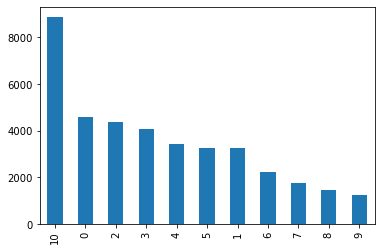

In [59]:
#Create a bar-chart for emp_length dependeing upon the number of value_counts
%matplotlib inline
df.emp_length.value_counts().plot.bar()
plt.show()

Here in emp_length, we can see employees have experience ranging from 0-10 years.

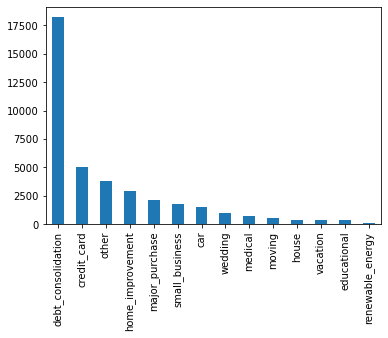

In [60]:
#Create a bar chart for purpose_value
df.purpose.value_counts().plot.bar()
plt.show()

In purpose column, we can see that debt_consolidation is having maximum value followed by credit_card and other.

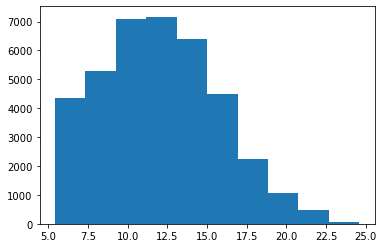

In [61]:
#Create a histogram for int_rate
plt.hist(df.int_rate)
plt.show()

In above histogram, we can see that most of the loan are distributed in the range of 10.0 to 12.5 interest rate.

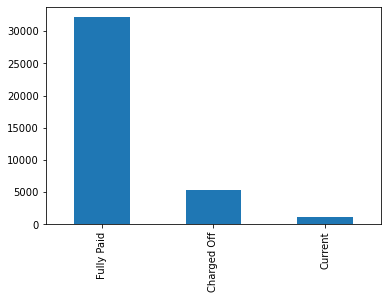

In [62]:
#Create a bar chart for loan_status
df.loan_status.value_counts().plot.bar()
plt.show()

In above bar chart, we can see that most of the customers have fully paid the loan and 5000+ are defaulters. And we have customers who are still paying the loan. We could remove the rows with current value so we can do analysis for "Fully Paid" and "Charged Off".

In [63]:
#Remove the rows with value "Current" from the loan_status.
df=df[~(df['loan_status']=='Current')]

In [64]:
df.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [65]:
df.loan_status = df.loan_status.apply(lambda x: int(0) if x=='Fully Paid' else int(1))

In [66]:
df.loan_status.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int64

In [67]:
df.loan_status = df.loan_status.astype('int64')

In [68]:
df.loan_status.dtype

dtype('int64')

In [69]:
#loan_status after removing the customer who are currently paying the loan.
df.loan_status.value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

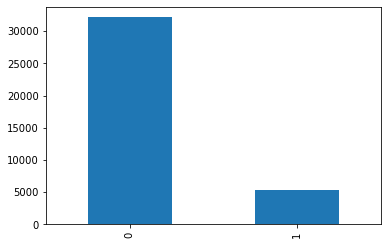

In [70]:
#Create a bar chart for loan_status
df.loan_status.value_counts().plot.bar()
plt.show()

Now we have only two values in loan_status. Defaulters are with value 1 in this case.

In [71]:
#Extract the data who are only defaulters to analyze further in df_choff
df_choff=df[(df['loan_status']== 1)]
df_choff.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,...,GA,1.00,0,5,3,0,1687,9.4,4,0.0
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,Others,4,...,CA,5.55,0,2,11,0,5210,32.6,13,0.0
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,0,...,TX,18.08,0,0,2,0,9279,36.5,3,0.0
12,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,...,VA,10.08,0,1,4,0,10452,91.7,9,0.0
14,10000,10000,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3,...,CA,7.06,0,2,14,0,11997,55.5,29,0.0


In [72]:
#Check addr_state column data value.
df_choff.addr_state.value_counts()

CA    1074
FL     482
NY     476
TX     309
NJ     276
GA     209
IL     194
VA     173
PA     170
MD     158
MA     150
OH     146
WA     118
AZ     114
NC     110
MO     106
NV     101
MI      97
CO      91
CT      89
MN      79
OR      69
SC      64
WI      59
LA      52
AL      51
KY      45
OK      40
UT      39
NM      29
HI      28
KS      26
AR      26
RI      25
NH      23
WV      21
DC      15
AK      15
DE      12
SD      11
MT      10
VT       6
WY       3
NE       3
MS       2
TN       2
ID       1
Name: addr_state, dtype: int64

In the below pie chart we can see that customers from the states **CA, FL, NY, TX and NJ** are major defaulters.

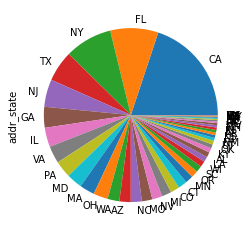

In [73]:
df_choff['addr_state'].value_counts().plot.pie()
plt.show()

Let us consider the verification_status field and see what information does it give.

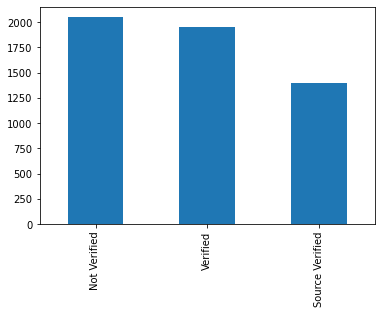

In [74]:
#Plot a bar chart for verification_status
df_choff['verification_status'].value_counts().plot.bar()
plt.show()

From the bar chart we see equal amount of defaulters are in both cases "Not Verified" and "Verified". So this factor doesnt tend for the defaulter.

Let us analyze whether interest rate results in defaulters.

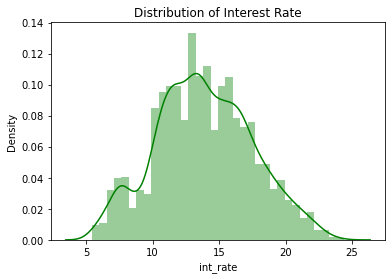

In [75]:
#Create a distribution plot for defaulters with int_rate
sns.distplot(df_choff.int_rate,color='g')
plt.title('Distribution of Interest Rate',fontsize=12)
plt.show()

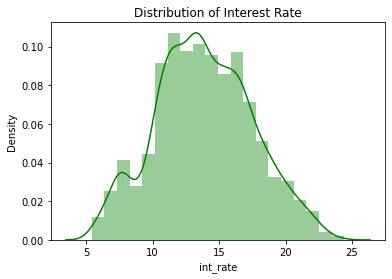

In [76]:
#Create a distribution plot for defaulters with bins=20
sns.distplot(df_choff.int_rate,bins=20,color='g')
plt.title('Distribution of Interest Rate',fontsize=12)
plt.show()

With distribution plot, we see that with interest rate between 10-17%, the customers tend to be defaulters.

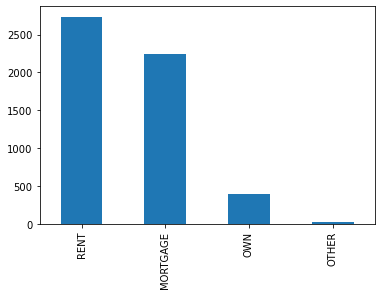

In [77]:
#Create a bar chart for home_ownership
df_choff.home_ownership.value_counts().plot.bar()
plt.show()

- Customers who are paying rent or who have mortage loan, tend to be defaulters.

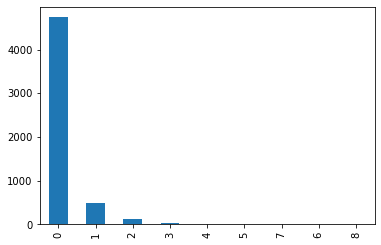

In [78]:
#Create a bar plot for field delinq_2yrs
df_choff.delinq_2yrs.value_counts().plot.bar()
plt.show()

So the field **"delinq_2yrs"** doesn't affect the defaulter factor. We could see that even the customer with 0 delinquency have also become defaulters. And frequency of customer with high delinquent is very less.

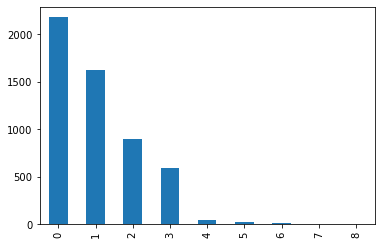

In [79]:
#Create a bar plot for field delinq_2yrs
df_choff.inq_last_6mths.value_counts().plot.bar()
plt.show()

So the field **"inq_last_6mths"** doesn't affect the defaulter factor. We could see that even the customer with 0 inquiries have become defaulters. And frequency of customer with high inquiries is less.

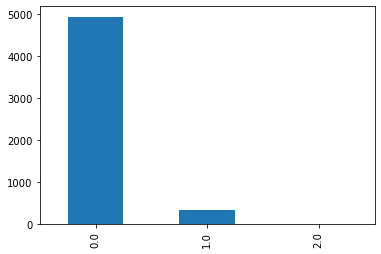

In [80]:
#Create a bar plot for field pub_rec_bankruptcies
df_choff.pub_rec_bankruptcies.value_counts().plot.bar()
plt.show()

So the field **"pub_rec_bankruptcies"** doesn't affect the defaulter factor. We could see that even the customer with 0 bankruptcies have become defaulters. And frequency of customer with high bankruptcies is less.

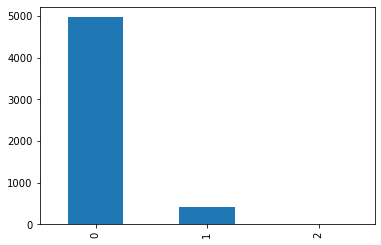

In [81]:
#Create a bar plot for field pub_rec
df_choff.pub_rec.value_counts().plot.bar()
plt.show()

Here the field **"pub_rec"** doesn't affect the defaulter factor. We could see that even the customer with 0 number of deroaatory records have become defaulters.

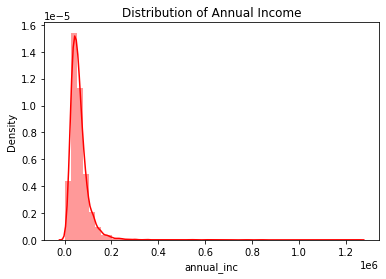

In [82]:
#Create a distribution plot for defaulters with annual_inc
sns.distplot(df_choff.annual_inc,color='r')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

In [83]:
df_choff.annual_inc.value_counts()

60000.0    253
50000.0    158
40000.0    149
30000.0    134
36000.0    123
          ... 
49992.0      1
57068.0      1
59712.0      1
24398.0      1
33990.0      1
Name: annual_inc, Length: 1188, dtype: int64

Let us construct a boxplot for field "annual_inc" and check out does it impact our data set.

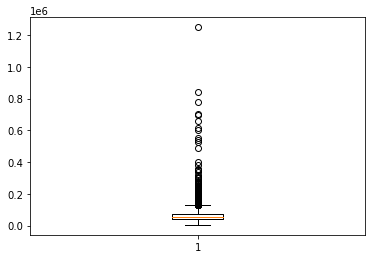

In [84]:
#Create a boxplot for annual income
plt.boxplot(df_choff.annual_inc)
plt.show()

We could see many outliers in this chart. So let us remove outliers using quantile and see how it looks like.

In [85]:
#Use 95% quantile to remove the outliers
quan=np.quantile(df_choff.annual_inc,0.95)
df1=df_choff[~(df_choff['annual_inc']>142000)]

In [86]:
df1.shape

(5196, 26)

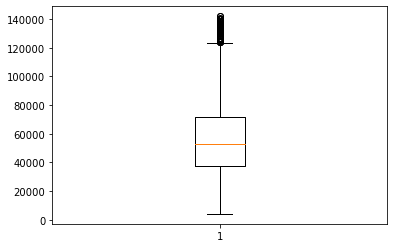

In [87]:
#Create a boxplot for annual income after removing outlier
plt.boxplot(df1.annual_inc)
plt.show()

Now the above boxplot looks better and we could see the majority of defaulters fall in the range of 40,000-70,000.

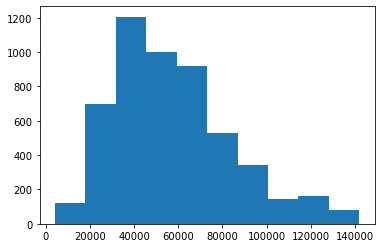

In [88]:
#Plot a histogram for annual income as well.
plt.hist(df1.annual_inc)
plt.show()

Here in this histogram it is more clearer that annual income people in the range 40,000-70,000 are defaulters.

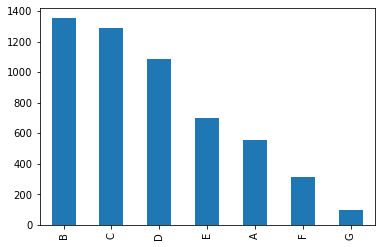

In [89]:
#Create a bar plot for field grade
df_choff.grade.value_counts().plot.bar()
plt.show()

We can see that customers who are in grade B and C are defaulters.

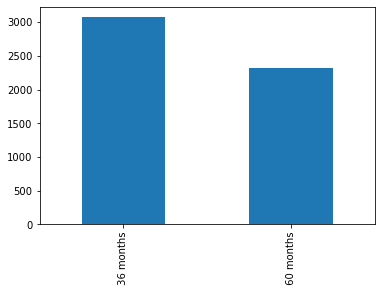

In [90]:
#Create a bar plot for field term
df_choff.term.value_counts().plot.bar()
plt.show()

Customer who go for lesser term tend to be defaulters.

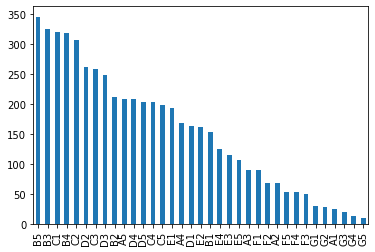

In [91]:
#Create a bar plot for field sub-grade
df_choff.sub_grade.value_counts().plot.bar()
plt.show()

With the above bar chart we can see the customers with subgrade between B-D are mostly defaulters.

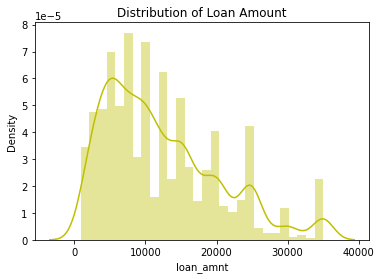

In [92]:
#Create a distribution plot for defaulters with loan amount
sns.distplot(df_choff.loan_amnt,color='y')
plt.title('Distribution of Loan Amount',fontsize=12)
plt.show()

Using loan amount field, we could see that defaulters are more when the loan amount range is in between 5000 to 10,000.

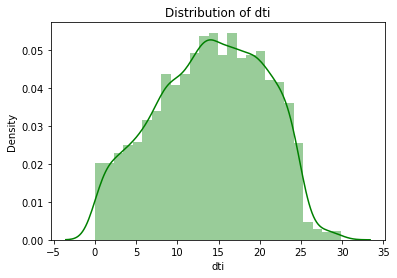

In [93]:
#Create a distribution plot for field dti
sns.distplot(df_choff.dti,color='g')
plt.title('Distribution of dti',fontsize=12)
plt.show()

Using dti field we could see that defaulters are more in the range of ratio 10-22.5

In [94]:
#Check the emp_title for defaulters
df_choff.emp_title.value_counts()

Others                       268
Bank of America               20
US Army                       18
Walmart                       14
UPS                           12
                            ... 
Greek America Foundation       1
U of D Jesuit High School      1
EEOC                           1
Life Ambulance                 1
Auto motors of miami           1
Name: emp_title, Length: 4625, dtype: int64

We see that employees from Bank of America, US Army, Walmart, UPS are in the defaulter list. So we need to consider while giving loans to these customers.

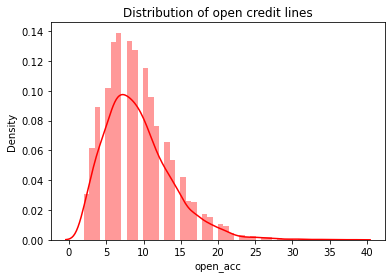

In [95]:
#Create a distribution plot for field open_acc
sns.distplot(df_choff.open_acc,color='r')
plt.title('Distribution of open credit lines',fontsize=12)
plt.show()

With the field open_acc, we see that customers with open credit lines between 5-12 are maximum defaulters.

In [96]:
#Let us see the correlation between each attributes against others
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.981603,0.936871,0.299237,0.931686,0.148895,0.266282,0.062680,0.061402,-0.033757,0.013068,0.174008,-0.046378,0.313399,0.062201,0.255538,-0.031758
funded_amnt,0.981603,1.000000,0.955300,0.302955,0.957721,0.148661,0.261959,0.059535,0.061251,-0.033857,0.013111,0.172546,-0.046898,0.306119,0.066283,0.249803,-0.032708
funded_amnt_inv,0.936871,0.955300,1.000000,0.295697,0.904110,0.159903,0.249320,0.040097,0.070007,-0.040029,-0.002744,0.159554,-0.048416,0.285718,0.071583,0.241953,-0.037598
int_rate,0.299237,0.302955,0.295697,1.000000,0.274791,0.000390,0.046092,0.213497,0.112188,0.158199,0.132576,0.007594,0.098996,0.095136,0.466023,-0.045310,0.082988
installment,0.931686,0.957721,0.904110,0.274791,1.000000,0.121996,0.264684,0.029868,0.050727,-0.021675,0.011296,0.169816,-0.042153,0.309157,0.091810,0.229250,-0.029352
emp_length,0.148895,0.148661,0.159903,0.000390,0.121996,1.000000,0.110831,0.016126,0.050268,0.015690,0.009475,0.096710,0.064025,0.150441,0.009931,0.207738,0.062669
annual_inc,0.266282,0.261959,0.249320,0.046092,0.264684,0.110831,1.000000,-0.038501,-0.123582,0.021229,0.035976,0.154494,-0.014369,0.276693,0.014676,0.233436,-0.012378
loan_status,0.062680,0.059535,0.040097,0.213497,0.029868,0.016126,-0.038501,1.000000,0.042803,0.018885,0.070874,-0.006293,0.049807,0.006679,0.099528,-0.020784,0.045625
dti,0.061402,0.061251,0.070007,0.112188,0.050727,0.050268,-0.123582,0.042803,1.000000,-0.034370,0.000480,0.288942,-0.004740,0.227602,0.279130,0.229949,0.006733
delinq_2yrs,-0.033757,-0.033857,-0.040029,0.158199,-0.021675,0.015690,0.021229,0.018885,-0.034370,1.000000,0.008305,0.010197,0.010188,-0.054401,-0.042610,0.066015,0.005739


From the above results, we could see some atributes have positive correlation while others have negative correlation.
We could see negative correlation with the attributes delinquency, public record bankruptices, revolving balance, public records that results in defaulters.

## Segmented Univariate Analysis

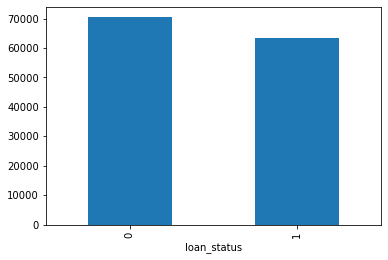

In [97]:
#Create a bar plot using segmented univariate for loan_status comparing the annual_inc using mean
df.groupby(['loan_status'])['annual_inc'].mean().plot.bar()
plt.show()

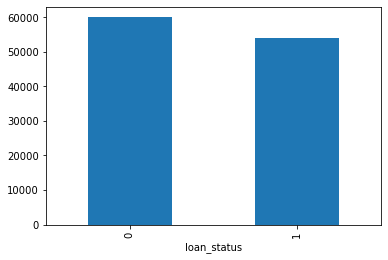

In [98]:
#Create a bar plot using segmented univariate for loan_status comparing the annual_inc using median
df.groupby(['loan_status'])['annual_inc'].median().plot.bar()
plt.show()

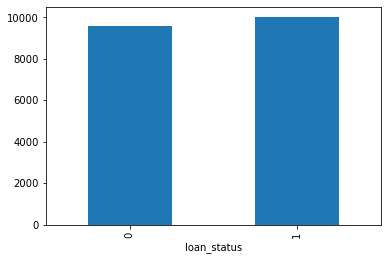

In [99]:
#Create a bar plot using segmented univariate for loan_status comparing the loan_amnt using median
df.groupby(['loan_status'])['loan_amnt'].median().plot.bar()
plt.show()

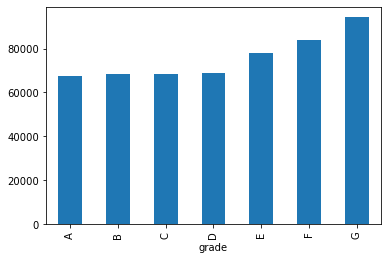

In [100]:
#Create a bar plot using segmented univariate for grade comparing the annual_inc using mean for defaulters and 
#fully paid
df.groupby(['grade'])['annual_inc'].mean().plot.bar()
plt.show()

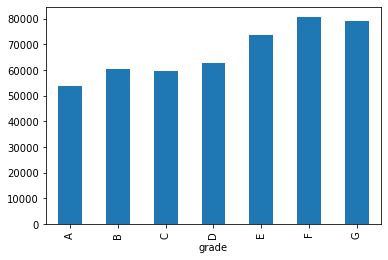

In [101]:
#Create a bar plot using segmented univariate for grade comparing the annual_inc using mean for defaulters
df_choff.groupby(['grade'])['annual_inc'].mean().plot.bar()
plt.show()

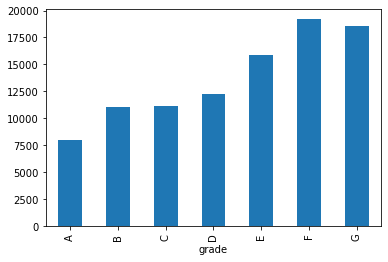

In [102]:
#Create a bar plot using segmented univariate for grade comparing the loan_amnt using mean
df_choff.groupby(['grade'])['loan_amnt'].mean().plot.bar()
plt.show()

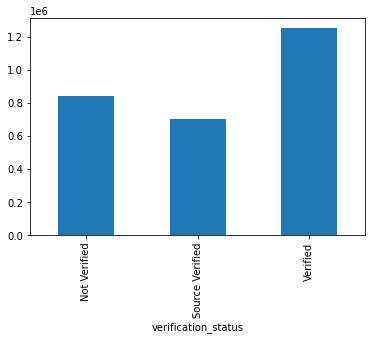

In [103]:
#Create a bar plot using segmented univariate for verification_status comparing the annual_inc using mean
df_choff.groupby(['verification_status'])['annual_inc'].max().plot.bar()
plt.show()

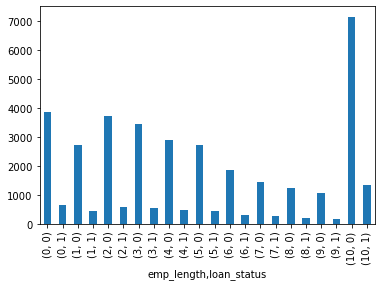

In [104]:
#Create a bar plot using segmented univariate for emp_length with the loan_status using value_counts() metric
df.groupby(['emp_length'])['loan_status'].value_counts().plot.bar()
plt.show()

## Bivariate Analysis

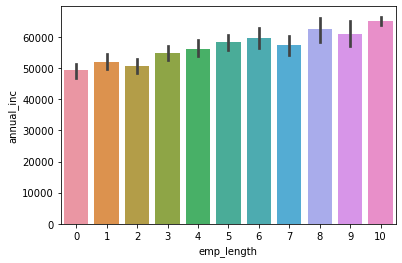

In [105]:
#Create bar plot for emp_length and annual_inc 
sns.barplot(df1.emp_length,df1.annual_inc)
plt.show()

From the bar plot, we can see that employees with employment length above 10 years tend to be defaulters.

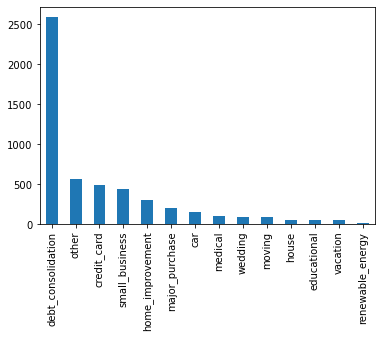

In [106]:
#Create bar plot for purpose 
df1.purpose.value_counts().plot.bar()
plt.show()

From the bar plot, we can see that consumers who took loan for debt_consolidation tend to be defaulters.

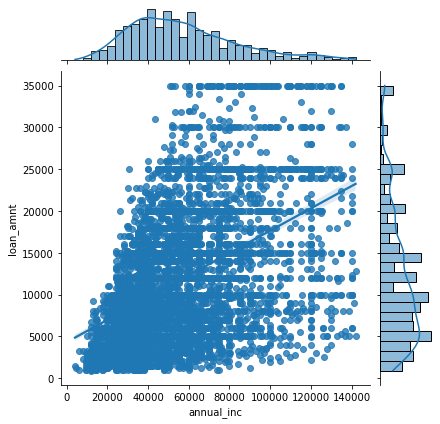

In [107]:
#Create joint plot for annual_inc and loan_amnt 
sns.jointplot(df1.annual_inc,df1.loan_amnt,kind='reg')
plt.show()

From the above plot, we can confirm that as annual income increases, the loan amount also increases.

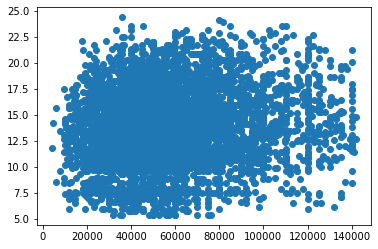

In [108]:
###Annual Income VS interest rate
plt.scatter(df1['annual_inc'],df1['int_rate'])
plt.show()

Scatter plot shows that for lesser annual income we have lesser interest rate for defaulters.

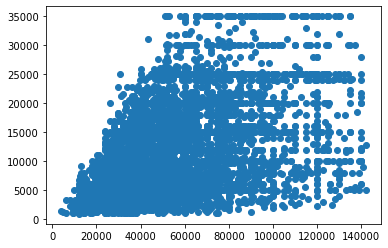

In [109]:
###Annual Income VS interest rate
plt.scatter(df1['annual_inc'],df1['loan_amnt'])
plt.show()

From above scatter plot, we can infer that lower income people distribution is more and they tend to become defaulters.

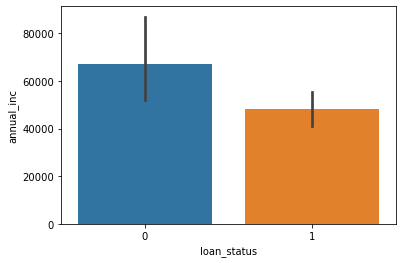

In [110]:
##Plot the bar plot with only the 95th percentile of int_rate
sns.barplot(data=df,x='loan_status',y='annual_inc',estimator=np.std)
plt.show()

From the above bar plot, if we take standard deviation as estimator, the loan status is similar to that of estimator with mean.

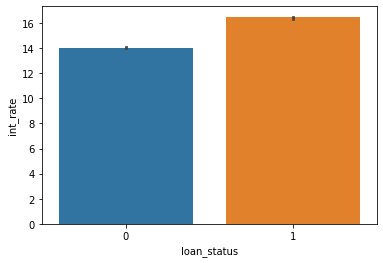

In [111]:
##Plot the bar plot with only the 95th percentile of int_rate
sns.barplot(data=df,x='loan_status',y='int_rate',estimator=lambda x: np.quantile(x,0.75))
plt.show()

From the above bar plot, if we take quantitle with 0.75 as estimator, the loan status is different and could see defaulters are more compared to fully paid.

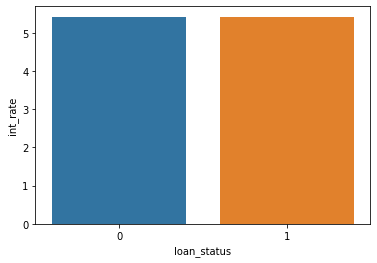

In [112]:
## Plot the bar plot with the minimum int_rate
sns.barplot(data=df,x='loan_status',y='int_rate',estimator=np.min)
plt.show()

From the above bar plot, it doesnt make much difference if we consider minimum value as estimator.

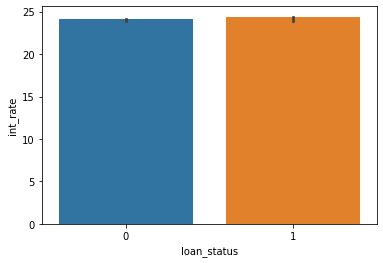

In [113]:
## Plot the bar plot with the minimum int_rate
sns.barplot(data=df,x='loan_status',y='int_rate',estimator=np.max)
plt.show()

From the above bar plot, it doesnt make much difference if we consider maximum value as estimator.

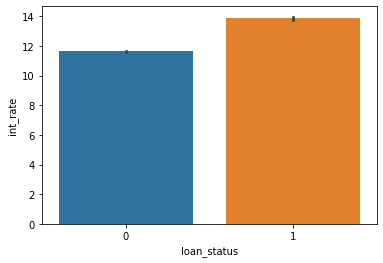

In [114]:
## Plot the bar plot with the minimum int_rate
sns.barplot(data=df,x='loan_status',y='int_rate',estimator=np.mean)
plt.show()

From the above bar plot, it doesnt make much difference if we consider mean value as estimator.

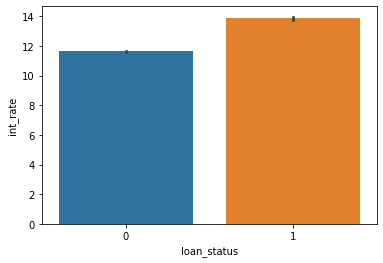

In [115]:
## Plot the bar plot for loan status with int_rate
import seaborn as sns
sns.barplot(x='loan_status',y='int_rate',data=df)
plt.show()

If we compare the interest rate with loan amount, most defaulters end up paying more interest rate. So customers who have greater interest rate tend to be defaulters.

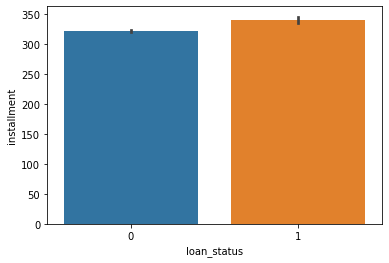

In [116]:
## Plot the bar plot for loan status with installment
sns.barplot(x='loan_status',y='installment',data=df)
plt.show()

From the above bar plot, when installment is compared for loan status, then defaulter pay greater amount of installment. If the installment amount is greater, then they become defaulters.

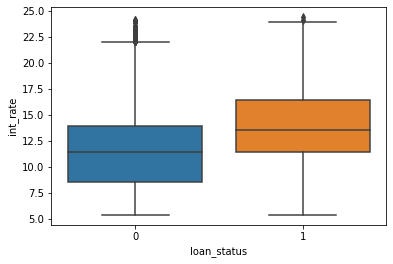

In [117]:
## Plot the box plot for loan status with int_rate
sns.boxplot(data=df,x='loan_status',y='int_rate')
plt.show()

Let us plot a box plot using loan status and interest rate. We see that the interest rate is higher for the defaulters compared to Fully paid customers.

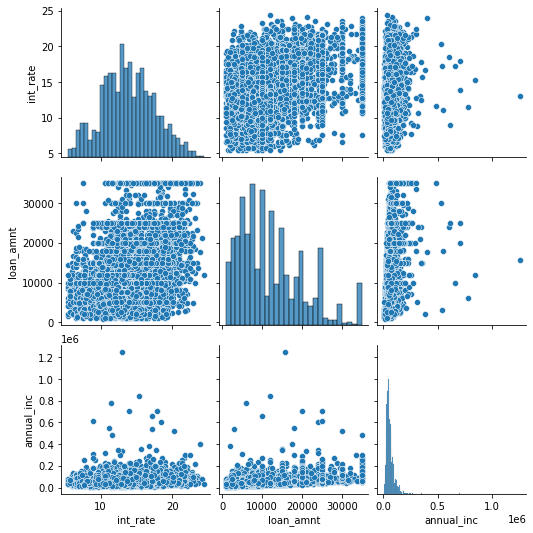

In [118]:
## Plot the pair plot for int_rate, loan_amnt, annual_inc
sns.pairplot(df_choff[['int_rate','loan_amnt','annual_inc']])
plt.show()

Using pair plot, we could see how int_rate, loan_amnt and annual_inc for defaulters to see how they are correlated.
From the plot, we could see defaulters are from low annual income, with loan amount between 10000-30000 and with interest rate between 12.5-14.5%

## Derived Metrics

In [119]:
#Let us see the field issue_d
df1.issue_d.head()
df1.issue_d.dtypes

dtype('O')

In [120]:
#Create new column date of format datetime.
from datetime import datetime
df1['Date'] = df1.issue_d.apply(lambda x : datetime.strptime(x,"%b-%y"))
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,Date
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,...,1.00,0,5,3,0,1687,9.4,4,0.0,2011-12-01
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,Others,4,...,5.55,0,2,11,0,5210,32.6,13,0.0,2011-12-01
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,0,...,18.08,0,0,2,0,9279,36.5,3,0.0,2011-12-01
12,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,...,10.08,0,1,4,0,10452,91.7,9,0.0,2011-12-01
14,10000,10000,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3,...,7.06,0,2,14,0,11997,55.5,29,0.0,2011-12-01


In [121]:
#Create two new columns Issued Year and Issued Month 
df1['Issued Year'] = df1['Date'].dt.year
df1['Issued Month'] = df1['Date'].dt.month

In [122]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,Date,Issued Year,Issued Month
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,...,5,3,0,1687,9.4,4,0.0,2011-12-01,2011,12
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,Others,4,...,2,11,0,5210,32.6,13,0.0,2011-12-01,2011,12
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,0,...,0,2,0,9279,36.5,3,0.0,2011-12-01,2011,12
12,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,...,1,4,0,10452,91.7,9,0.0,2011-12-01,2011,12
14,10000,10000,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3,...,2,14,0,11997,55.5,29,0.0,2011-12-01,2011,12


We have month and Year and we could perform analysis depending upon Month and Year.

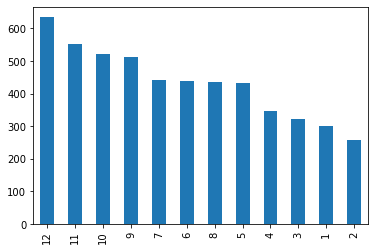

In [123]:
#Plot a bar for loan issued in the Month.
df1['Issued Month'].value_counts().plot.bar()
plt.show()

Loan is issued more in the later part of the Year.

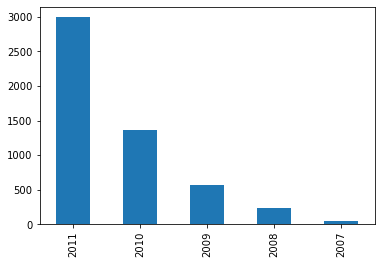

In [124]:
#Plot a bar for loan issued in the Year.
df1['Issued Year'].value_counts().plot.bar()
plt.show()

Loan is issued more in the year 2011.

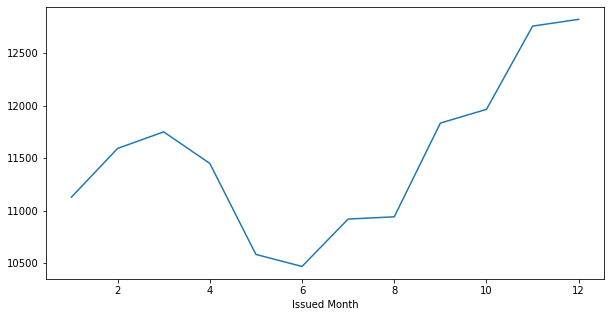

In [125]:
## Plot a line graph
plt.figure(figsize=[10,5])
df1.groupby(['Issued Month'])['funded_amnt'].mean().plot()
plt.show()

With above line chart, we see that funded amount decreases between March-June.

In [126]:
## Create a pivot table for Employee Grade and Issued Month with the values set to loan_status
grade= pd.pivot_table(data=df1,values='loan_status',index='Issued Month',columns='grade',aggfunc=sum)

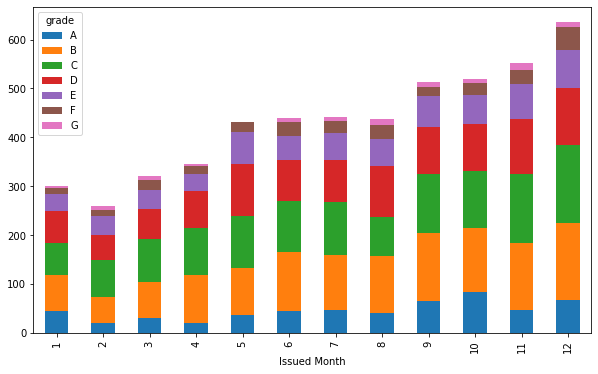

In [127]:
grade.plot(kind='bar',stacked='True',figsize=[10,6])
plt.show()

We can see that defaulters are in the grade B-E.

In [128]:
## Create a pivot table for Employee Grade and Issued Month with the values set to loan_status
emplen= pd.pivot_table(data=df1,values='loan_status',index='emp_length',columns='grade',aggfunc=sum)

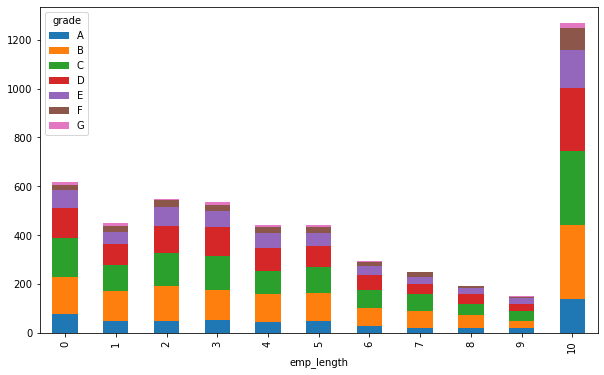

In [129]:
emplen.plot(kind='bar',stacked='True',figsize=[10,6])
plt.show()

Employees with experience greater than 10 are defaulters.

## Conclusion:
- The consumer who has been working for over 10 years is more likely to default, based on his or her Employment length. 
- The purpose of the loan determines how likely consumers are to default. Consumers who consolidate their debts are more likely to default. Since these consumers already have debt, they tend to default. 
- Majority of defaulters are from California, Florida, New York, Texas and New Jersey. When lending money to consumers from these states, we must verify their credit status.
- Customers opting for shorter terms tend to default more often.
- Paying rent or having a mortgage loan tends to put consumers at risk of default.
- In lower grades between B and D, consumers are more likely to default.
- Consumers whose annual income is in the range of 40,000-70,000 are at a greater risk of default
- As we can see from the loan amount, default rates are higher when loan amounts are lower.
- We can see that interest rates between 12-17% tend to be more dense, and the consumers tend to default.
- In the distribution plot for the dti field, we see defaulters are more in the range of 10-22.5% 
- We can see from the distribution plot for the open credit line that defaulters are more likely to occur when the credit line is lower.
- Consumers from Bank of America, US Army, Walmart, and UPS are listed as defaulters.
- We can see that the percentage of defaulters is equal in both cases. As a result, this factor does not favor the defaulter.
